### Aug

In [1]:
import pandas as pd
import json
from collections import defaultdict as ddict
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/aug_cluster.csv')

In [3]:
df.head(5)

,Unnamed: 0,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,URL after redirects,Final URL,suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,0,reddit.com,https://www.reddit.com/r/u_rmaccr/comments/ibi...,83,0,0,62335.0,151.101.65.140,snooserv,https://www.reddit.com/user/rmaccr/comments/ib...,https://www.reddit.com/user/rmaccr/comments/ib...,N,188,0,1,0,1,N,0,1
1,1,sputniknews.com,https://fr.sputniknews.com/international/20200...,83,0,0,112305.0,178.248.237.18,QRATOR,None,https://fr.sputniknews.com/international/20200...,N,152,0,0,0,0,N,16,1
2,2,minci.gob.ve,http://www.minci.gob.ve/primer-lote-de-la-vacu...,83,0,0,73169.0,201.249.71.50,Apache/2.4.10 (Debian),None,http://www.minci.gob.ve/primer-lote-de-la-vacu...,N,89,0,0,0,0,N,12,2
3,3,sptnkne.ws,https://sptnkne.ws/Dv3G,83,0,0,87110.0,195.93.247.47,QRATOR,https://tr.sputniknews.com/turkiye/20200817104...,https://tr.sputniknews.com/turkiye/20200817104...,N,105,0,0,0,0,N,6,1
4,4,hispanosaldia.com,http://hispanosaldia.com/2020/08/17/inmunologa...,83,0,0,118769.0,172.67.144.76,cloudflare,None,http://hispanosaldia.com/2020/08/17/inmunologa...,N,117,0,0,0,0,N,11,0


In [4]:
df.columns

Index(['Unnamed: 0', 'domain', 'scanned url', 'total', 'positives',
       'duration[VT]', 'rlength', 'resolution', 'server',
       'URL after redirects', 'Final URL', 'suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus',
       'num_subdomains'],
      dtype='object')

In [5]:
cdf = df[['Final URL', 'total', 'positives','duration[VT]','suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus','num_subdomains']]

In [6]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://www.reddit.com/user/rmaccr/comments/ib...,83,0,0,N,188,0,1,0,1,N,0,1
1,https://fr.sputniknews.com/international/20200...,83,0,0,N,152,0,0,0,0,N,16,1
2,http://www.minci.gob.ve/primer-lote-de-la-vacu...,83,0,0,N,89,0,0,0,0,N,12,2
3,https://tr.sputniknews.com/turkiye/20200817104...,83,0,0,N,105,0,0,0,0,N,6,1
4,http://hispanosaldia.com/2020/08/17/inmunologa...,83,0,0,N,117,0,0,0,0,N,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,https://ru.sputnik.kg/economy/20200826/1049426...,83,0,0,N,108,0,0,0,0,N,4,2
13664,https://rs.sputniknews.com/vesti/2020082611232...,83,0,0,N,199,0,0,0,0,N,10,1
13665,https://fr.sputniknews.com/france/202008261044...,83,0,0,N,133,0,0,0,0,N,13,1
13666,https://mobile.twitter.com/AGHamilton29/status...,83,0,0,N,66,0,1,0,1,N,0,1


In [7]:
cdf.dtypes

Final URL         object
total              int64
positives          int64
duration[VT]       int64
suspicious_tld    object
length             int64
fake_tld           int64
brand              int64
pop_keywords       int64
similar            int64
is_idn            object
minus              int64
num_subdomains     int64
dtype: object

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cdf['suspicious_tld'] = label_encoder.fit_transform(cdf['suspicious_tld'])
cdf['is_idn'] = label_encoder.fit_transform(cdf['is_idn'])

In [9]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://www.reddit.com/user/rmaccr/comments/ib...,83,0,0,0,188,0,1,0,1,0,0,1
1,https://fr.sputniknews.com/international/20200...,83,0,0,0,152,0,0,0,0,0,16,1
2,http://www.minci.gob.ve/primer-lote-de-la-vacu...,83,0,0,0,89,0,0,0,0,0,12,2
3,https://tr.sputniknews.com/turkiye/20200817104...,83,0,0,0,105,0,0,0,0,0,6,1
4,http://hispanosaldia.com/2020/08/17/inmunologa...,83,0,0,0,117,0,0,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,https://ru.sputnik.kg/economy/20200826/1049426...,83,0,0,0,108,0,0,0,0,0,4,2
13664,https://rs.sputniknews.com/vesti/2020082611232...,83,0,0,0,199,0,0,0,0,0,10,1
13665,https://fr.sputniknews.com/france/202008261044...,83,0,0,0,133,0,0,0,0,0,13,1
13666,https://mobile.twitter.com/AGHamilton29/status...,83,0,0,0,66,0,1,0,1,0,0,1


In [10]:
#Normalize columns of pandas data frame
cdf = cdf.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [11]:
cdf

,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,1.0,0.0,0.0,0.0,0.204793,0.0,1.0,0.0,0.5,0.0,0.000000,0.1
1,1.0,0.0,0.0,0.0,0.165577,0.0,0.0,0.0,0.0,0.0,0.390244,0.1
2,1.0,0.0,0.0,0.0,0.096950,0.0,0.0,0.0,0.0,0.0,0.292683,0.2
3,1.0,0.0,0.0,0.0,0.114379,0.0,0.0,0.0,0.0,0.0,0.146341,0.1
4,1.0,0.0,0.0,0.0,0.127451,0.0,0.0,0.0,0.0,0.0,0.268293,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13663,1.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.097561,0.2
13664,1.0,0.0,0.0,0.0,0.216776,0.0,0.0,0.0,0.0,0.0,0.243902,0.1
13665,1.0,0.0,0.0,0.0,0.144880,0.0,0.0,0.0,0.0,0.0,0.317073,0.1
13666,1.0,0.0,0.0,0.0,0.071895,0.0,1.0,0.0,0.5,0.0,0.000000,0.1


In [12]:
cdf.isnull().sum()

total             0
positives         0
duration[VT]      0
suspicious_tld    0
length            0
fake_tld          0
brand             0
pop_keywords      0
similar           0
is_idn            0
minus             0
num_subdomains    0
dtype: int64

### T_SNE

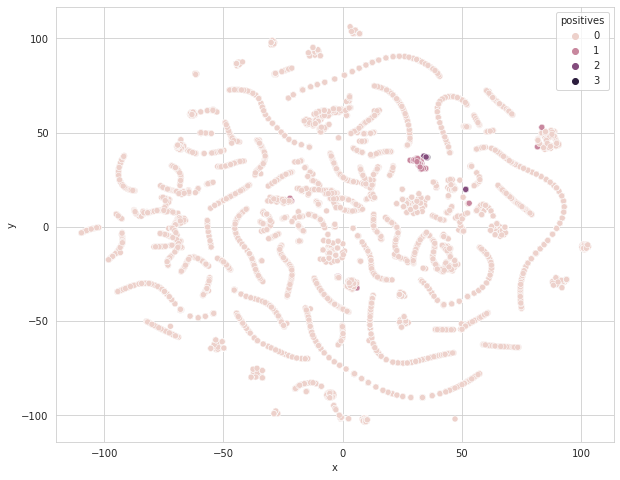

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(cdf)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=X_embedded,x='x',y='y',hue='positives')
# plt.plot(X_embedded)
plt.show()

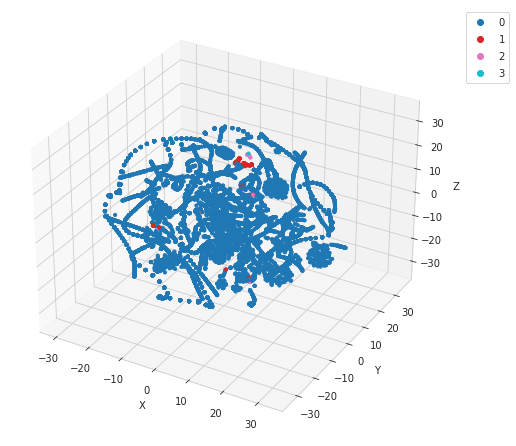

In [14]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(cdf)
X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'z':x[0][2],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.positives, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### DB SCAN

In [15]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(cdf)

In [16]:
set(clustering.labels_)

{0}